In [3]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train) 


In [4]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [5]:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))) 

Training set score: 0.67
Test set score: 0.66


In [6]:
X, y = mglearn.datasets.load_extended_boston() 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LinearRegression().fit(X_train, y_train) 

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [8]:
from sklearn.linear_model import Ridge 
Ridge=Ridge().fit(X_train,y_train) 
print("Training set score: {:.2f}".format(Ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(Ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [27]:
from sklearn.linear_model import Ridge 
Ridge10 = Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(Ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(Ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [26]:
from sklearn.linear_model import Ridge 
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test))) 

Training set score: 0.93
Test set score: 0.77


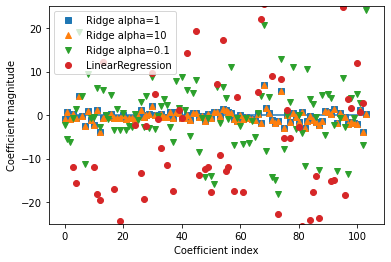

In [29]:
plt.plot(Ridge10.coef_, 's', label="Ridge alpha=1") 
plt.plot(Ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1") 
plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25) 
plt.legend() 

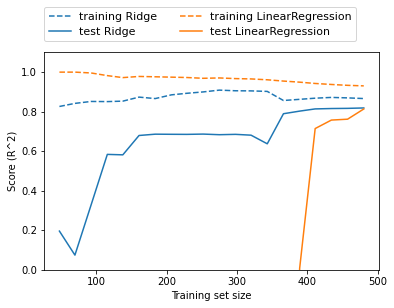

In [30]:
mglearn.plots.plot_ridge_n_samples()

In [31]:
from sklearn.linear_model import Lasso 
lasso = Lasso().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [32]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [33]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

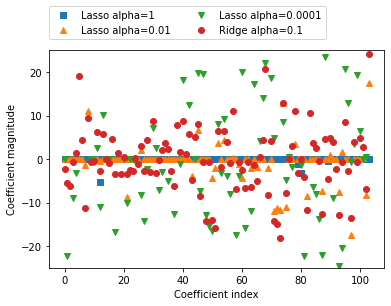

In [34]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001") 
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.legend(ncol=2, loc=(0, 1.05)) 
plt.ylim(-25, 25) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")

c:\python\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


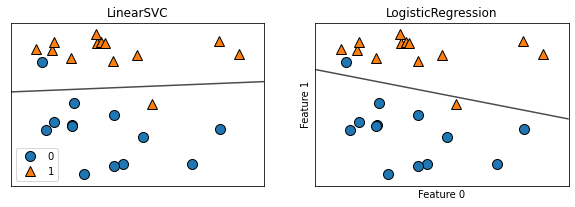

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge() 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{}".format(clf.__class__.__name__)) 
ax.set_xlabel("Feature 0") 
ax.set_ylabel("Feature 1") 
axes[0].legend()

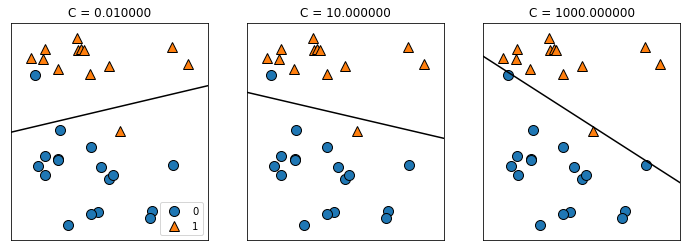

In [38]:

mglearn.plots.plot_linear_svc_regularization()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.941
Test set score: 0.965


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.958


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test))) 

Training set score: 0.937
Test set score: 0.930


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


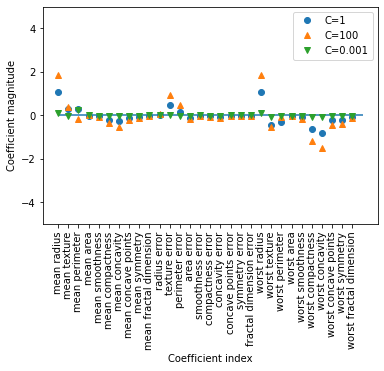

In [44]:
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend() 

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


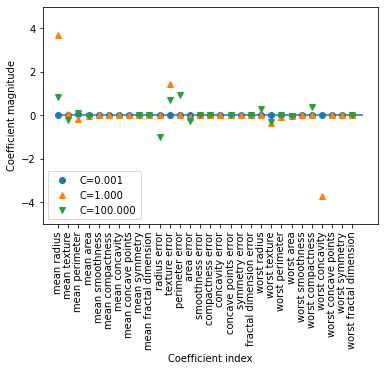

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format( C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format( C, lr_l1.score(X_test, y_test))) 
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C)) 

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)


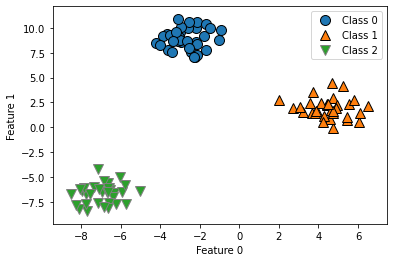

In [48]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(random_state=42) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(["Class 0", "Class 1", "Class 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y) 
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape) 

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


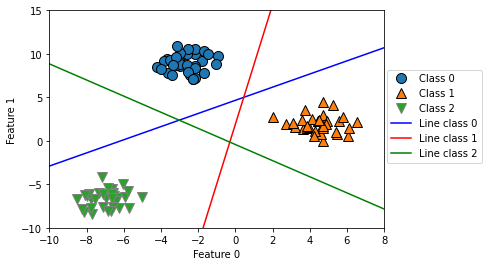

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
plt.ylim(-10, 15) 
plt.xlim(-10, 8) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

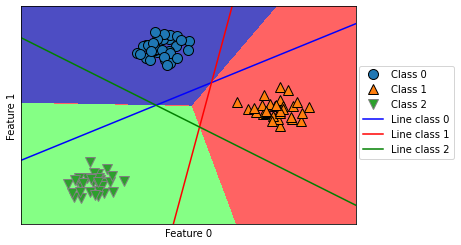

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']): plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3)) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

In [57]:
###DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [58]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [60]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

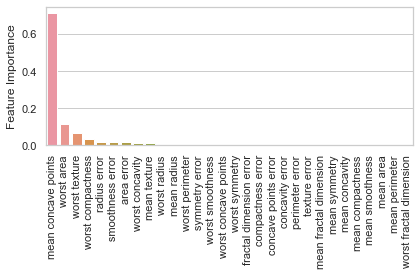

In [66]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

feature_importances = pd.DataFrame(tree.feature_importances_, index=cancer.feature_names, columns=["importance"])
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

sns.barplot(x=feature_importances.index, y=feature_importances["importance"])
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


In [67]:

print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.0096886  0.         0.         0.         0.
 0.         0.71160121 0.         0.         0.01948008 0.
 0.         0.01676117 0.017502   0.         0.         0.
 0.         0.         0.         0.06706044 0.         0.11373562
 0.         0.03421113 0.00995974 0.         0.         0.        ]


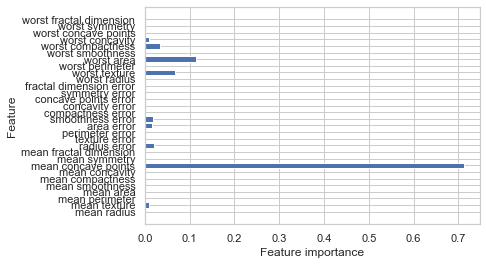

In [69]:

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


plot_feature_importances_cancer(tree)
plt.show()


Feature importances: [0. 1.]


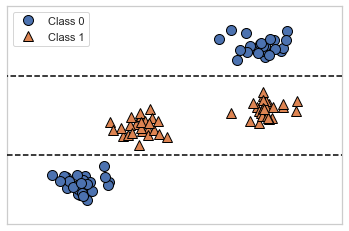

In [71]:
import matplotlib.pyplot as plt
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
plt.show()


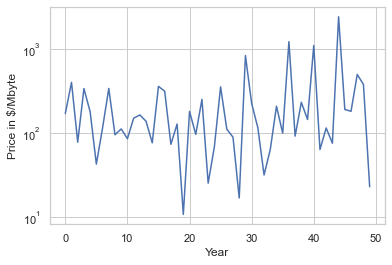

In [73]:
start_date = 1970
end_date = 2020
num_years = end_date - start_date
years = np.arange(num_years)
prices = np.exp(np.random.normal(5, 1, size=num_years))


ram_prices = pd.DataFrame({'date': years, 'price': prices})

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()


In [74]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-74-4536aff91b3c>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-74-4536aff91b3c>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


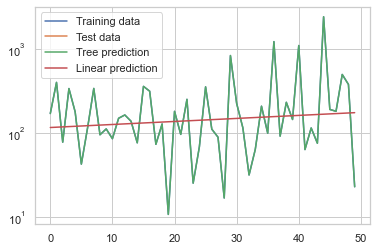

In [75]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()